In [17]:
import os
import sys
src_path = sys.path[0].replace("paper_working", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("paper_working", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

rc_={
    "figure.dpi":300,
    "font.size":8,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
    "legend.frameon":False
}
plt.rcParams.update(rc_)
legend_fs=10
label_fs=14
ticklabel_fs=10
from utils.plot_utils import *
from plot_helper import *
customize_plt() # customize plt configs, see plot_utils

In [18]:
# get the predictions and calculate the errors

methods=['DeepAR_optuna','LR_NAIVE','LR_PCo','TFT_optuna','XGB']
df=pd.read_csv(r'L:\Coding_project\Energy_grid_new\data\UCSD_raw_data\BLD_Sum.csv',index_col=0)
df.index=pd.to_datetime(df.index)
df_pred=df[pd.Timestamp(2019,1,1,0,0):pd.Timestamp(2019,12,31,23,45)]

for method in methods:
    fn=os.path.join('L:\Coding_project\Energy_grid_new\data\load_forecast',method,'BLD_Sum.csv')
    df=pd.read_csv(fn,index_col=0)
    df.index=pd.to_datetime(df.index)
    df.rename(columns={'RealPower':method},inplace=True)
    try:
        df_pred=pd.merge(df_pred,df,on='DateTime')
    except:
        ...
    
df_pred=df_pred.drop(columns=['RealPower_before_scaling'])   


In [19]:
df_pred=df_pred[pd.Timestamp(2019,5,1,0,0):pd.Timestamp(2019,5,7,0,0)]

metrics=pd.read_excel(r'L:\Coding_project\Energy_grid_new\load_pred\model_metrics.xlsx',index_col=0)

metrics=metrics.drop(index='TFT_NAIVE')
metrics=metrics[['CV', 'MAE', 'MAPE', 'RMSE', 'R2']]

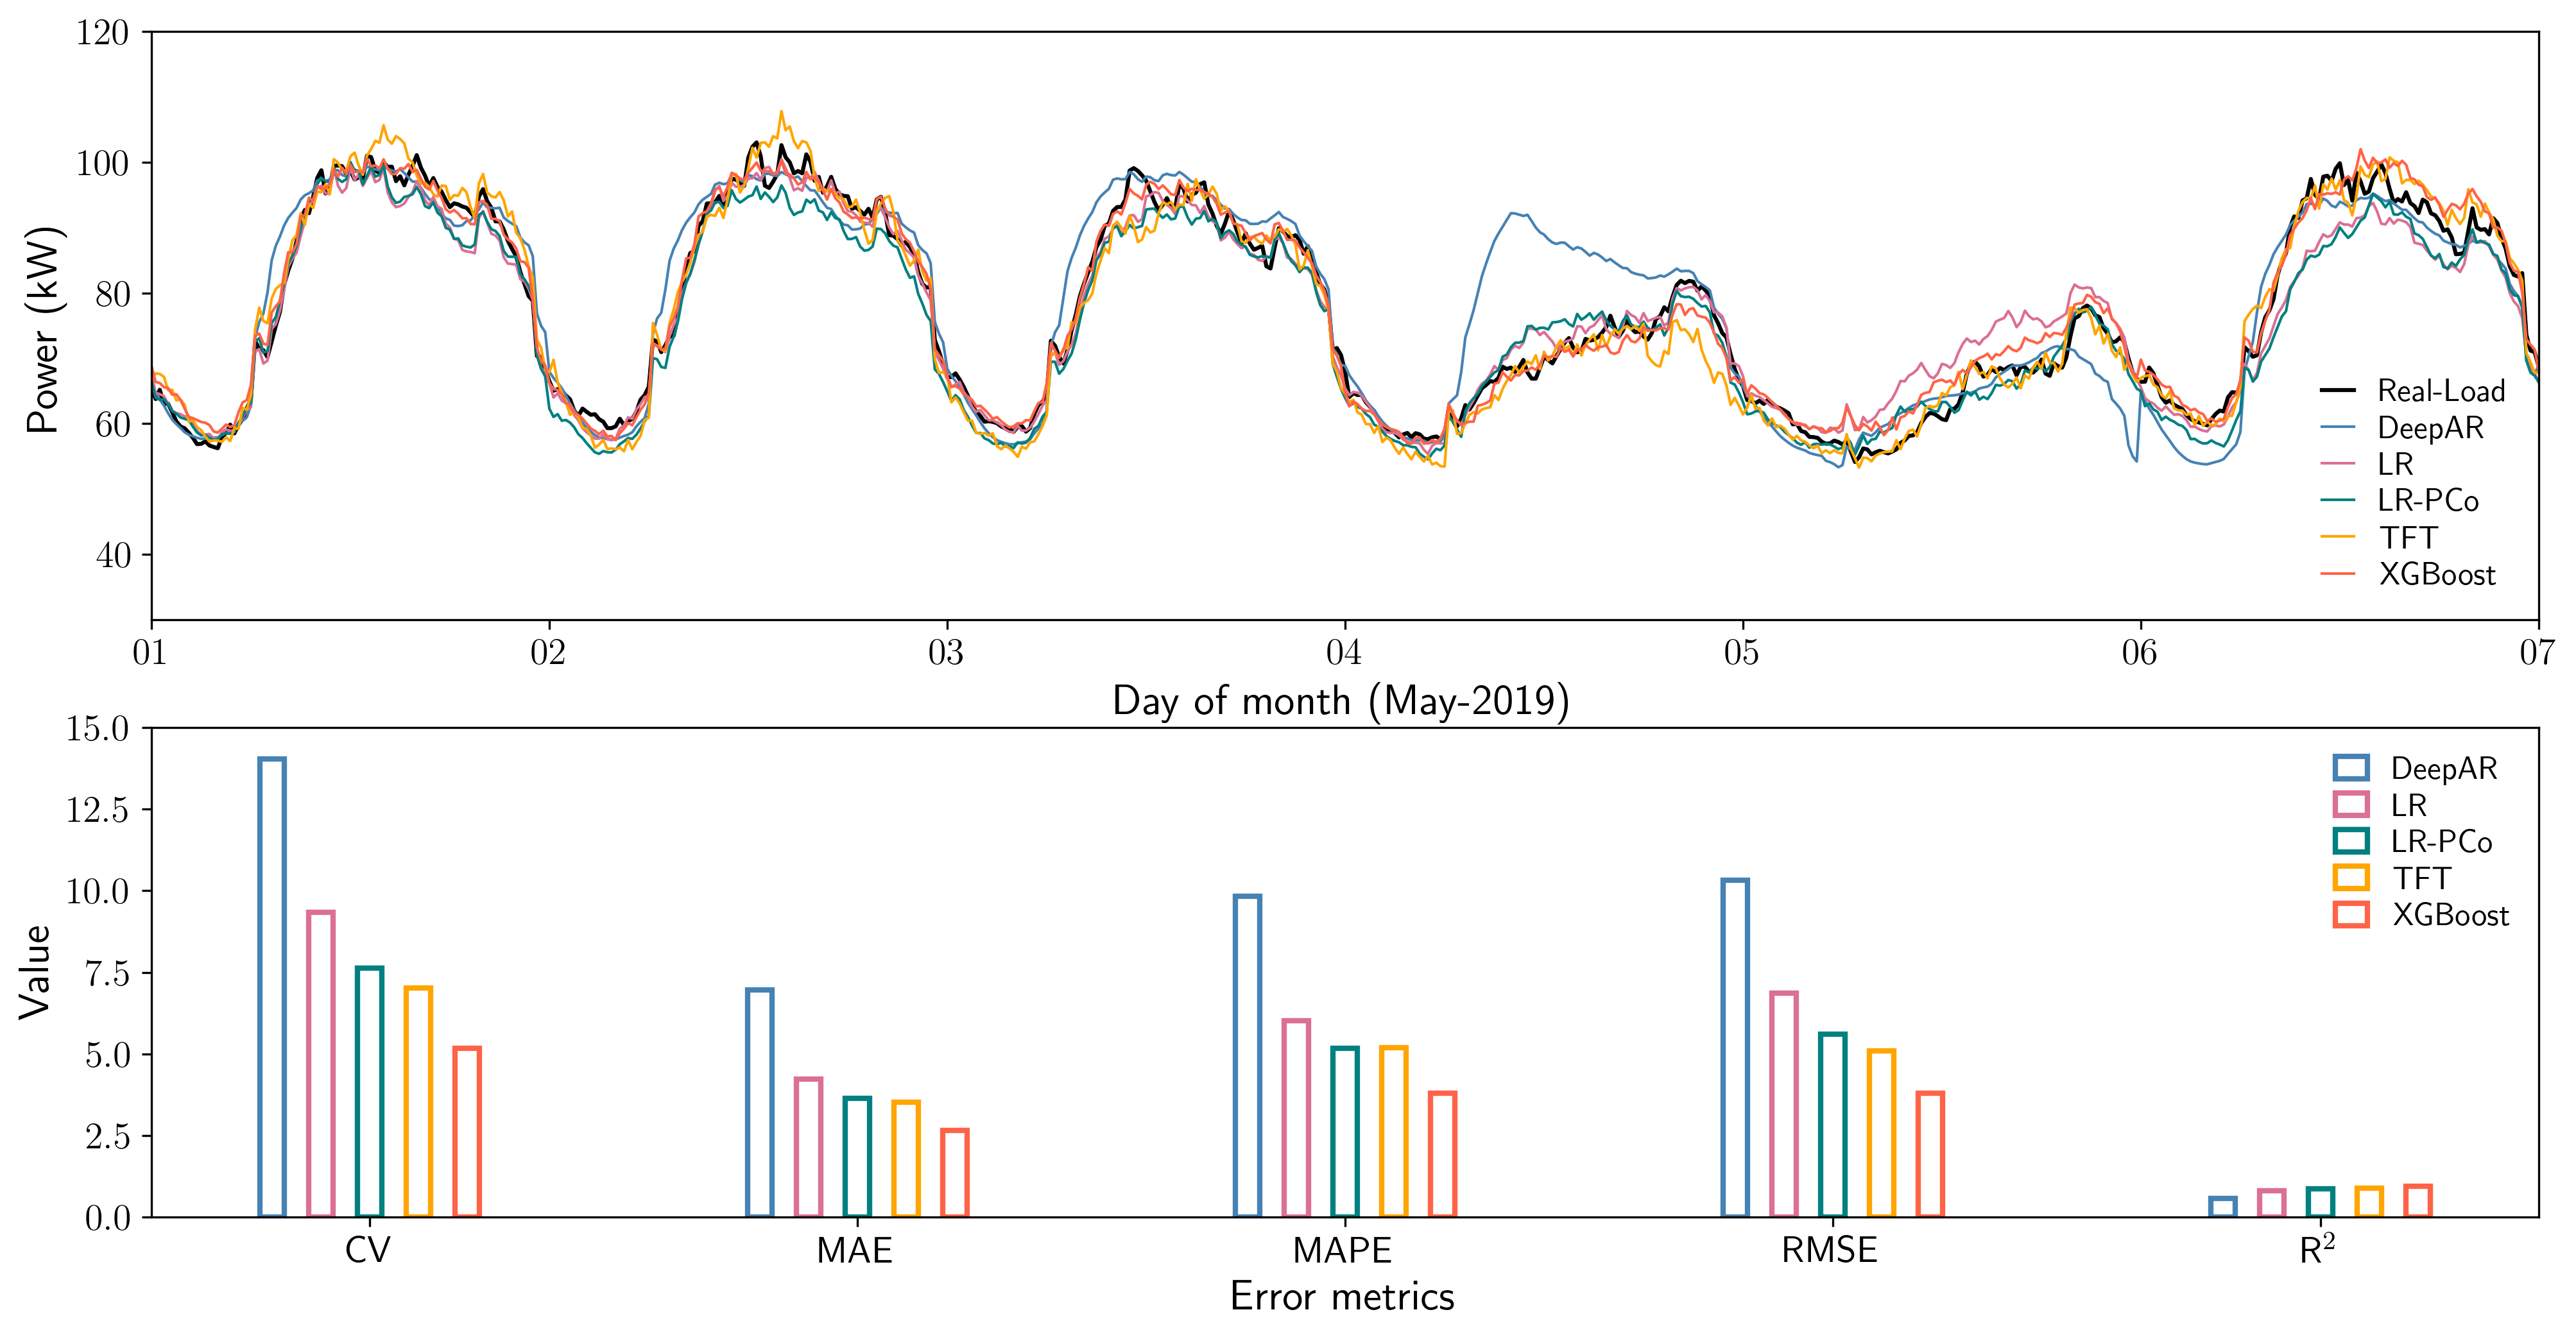

In [25]:
import matplotlib.dates as mdates

label_dic={
    'DeepAR_optuna':'DeepAR',
    'LR_NAIVE':'LR',
    'LR_PCo':'LR-PCo',
    'TFT_optuna':'TFT',
    'XGB':'XGBoost'
}
# Set the format of xticklabels


fig,axss=plt.subplots(2,1,figsize=(16,8),sharex=False,sharey=False,height_ratios=[1.2,1])

axs=axss[0]
axs.plot(df_pred.index,df_pred['RealPower'],linewidth=1.5,label='Real-Load',color='black')
for key in methods:
    axs.plot(df_pred.index,df_pred[key],linewidth=1,label=label_dic[key],color=color_dic_glb[key])
axs.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
axs.set_ylim(30,120)
axs.set_xlim(df_pred.index.min(),df_pred.index.max())
axs.set_xlabel('Day of month (May-2019)')
axs.set_ylabel('Power (kW)')
axs.legend()

import matplotlib.pyplot as plt
import numpy as np

axs=axss[1]

x = np.arange(5)
y = [6, 10, 4, 5, 1]
y1 = [2, 6, 3, 8, 5]
# 多数据并列柱状图
bar_width = 0.35  
tick_label=['CV', 'MAE', 'MAPE', 'RMSE', 'R$^2$']
k=0
for i in label_dic.keys():
    axs.bar(x+0.1*k, np.array(metrics.loc[i].values), 0.05, align='center', edgecolor=color_dic_glb[i],linewidth=2,
            color='w',alpha=1, label=label_dic[i])
    k+=1

plt.xlabel('Error metrics')
plt.ylabel('Value')
axs.set_ylim(0,15)
plt.xticks(x+0.1*2, tick_label)
plt.legend()